## Import Depencdencies

In [1]:
from tensorflow.keras.layers import Dense , Flatten 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.activations import relu,sigmoid,linear , softmax
# from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


## Pre Processing

In [2]:
(x_train , y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

ValueError: not enough values to unpack (expected 4, got 2)

In [4]:

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape

(60000, 784)

In [5]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
x_train.shape

(60000, 784)

In [7]:
scalar = MinMaxScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [8]:
x_train = x_train.reshape(-1 , 28 , 28 , 1)
x_test = x_test.reshape(-1 , 28 , 28 ,1)
x_train.shape


(60000, 28, 28, 1)

In [9]:
tf.random.set_seed(1234) # for consistent results
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(25, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu'),
    tf.keras.layers.Conv2D(25, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu'),
    tf.keras.layers.Conv2D(25 ,  (3,3) , activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256 , activation="relu"),
    tf.keras.layers.Dense(128 , activation="relu"),
    tf.keras.layers.Dense(64 , activation="relu"),
    tf.keras.layers.Dense(32 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax"),
    
])

In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'] , 
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 25)        5650      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 25)        5650      
                                                                 
 flatten (Flatten)           (None, 12100)             0         
                                                                 
 dense (Dense)               (None, 256)               3097856   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [12]:
history = model.fit(
    x_train,y_train,
    epochs=20 ,
    validation_data = (x_test, y_test)
)

Epoch 1/20


C:\Users\shadm\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 54s 24ms/step - loss: 0.1443 - accuracy: 0.9567 - val_loss: 0.0763 - val_accuracy: 0.9759
Epoch 2/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 3/20
1018/1875 [===============>..............] - ETA: 19s - loss: 0.0329 - accuracy: 0.9900

<function matplotlib.pyplot.show(close=None, block=None)>

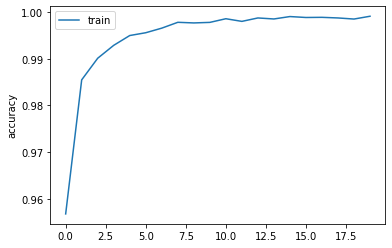

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.ylabel('accuracy')
plt.legend()
plt.show

In [ ]:
probs = model.predict(x_test[:150])
preds = np.argmax(probs , axis=1)

3


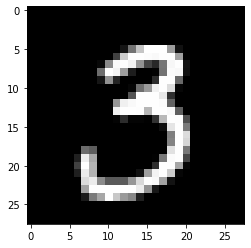

In [ ]:
print(preds[90])
plt.imshow(x_test[90] , cmap='gray')

In [ ]:
from tensorflow.keras.applications import EfficientNetB0, DenseNet121
model = EfficientNetB0(weights='imagenet')


In [ ]:
# from efficientnet.keras import EfficientNetB7